In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
import random
import os
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, preprocess_input, decode_predictions)


Using TensorFlow backend.


# Information from User

In [2]:
#Creación del formulario para el usuario

user_dict = {
    "First_Name":'',
    "Last_Name": '',
    "Age":'',
    "Sex":'',
    "Weight_in_Kilograms":'',
    "Height_in_meters":''
    }



for key in user_dict:
    user_dict[key] = str(input(f"Please type your {key} "))

activitie = str(input(f"Please type your type of activitie you have: Sedentary (S), Low Active (L), Active (A) or Very Active (V) "))

if user_dict["Sex"] == "Women":
    pregnant_q = str(input(f"Please type if you are pregnant Yes(Y)/ No(N) (Only the letter) "))
else:
    pregnant_q = "N/A"

if pregnant_q == "Y":
    pregnant_a = int(input(f"In wich trimester of pregnancy are you (Only the number) ? "))
else:
    pregnant_a = "N/A"
    
if user_dict["Sex"] == "Women":
    lactation_q = str(input(f"Please type if you are in lactation Yes(Y)/ No(N) (Only the letter)"))
else:
    lactation_q = "N/A"

if lactation_q == "Y":
    lactation_a = int(input(f"Please type if you are inside the 1st or 2nd Semester of lactation (Only put the number) "))
else:
    lactation_a = "N/A"

Please type your First_Name Alejandro
Please type your Last_Name Dorantes
Please type your Age 26
Please type your Sex Men
Please type your Weight_in_Kilograms 77
Please type your Height_in_meters 1.77
Please type your type of activitie you have: Sedentary (S), Low Active (L), Active (A) or Very Active (V) S


In [3]:
#Cálculo del IMC actual y el ideal.

IMC_actual = round(float(user_dict["Weight_in_Kilograms"])/(float(user_dict["Height_in_meters"])**2),2)

if (IMC_actual < 24.9 and IMC_actual > 18.5):
    IMC_ideal = IMC_actual    
if IMC_actual > 24.9:
    IMC_ideal = 24.5
if IMC_actual < 18.5:
    IMC_ideal = 19
    
Ideal_Weight = round(IMC_ideal * (float(user_dict["Height_in_meters"])**2),1)

Variance_Weight = round(float(user_dict["Weight_in_Kilograms"]) - float(Ideal_Weight),1)


In [4]:
#Cálculo de la actividad física, para la fórmula de EER

pa_data_df = pd.DataFrame({"Category": ["S", "L", "A", "V"],
                          "Men": [1,1.11,1.25,1.48],
                          "Woman": [1,1.12,1.27,1.45]})

pa_data_df = pa_data_df.set_index("Category")

if user_dict["Sex"] == "Men":
    P_Activitie = pa_data_df.loc[activitie,"Men"]
else:
    P_Activitie = pa_data_df.loc[activitie,"Woman"]


#Cálculo del requerimiento de energía diario de una persona.

EER_Men= float(662) - (9.53 * float(user_dict["Age"]))+ float(P_Activitie) *((15.91*float(Ideal_Weight)) + (539.6*float(user_dict["Height_in_meters"]))) 
EER_Women= float(354) - (6.91 * float(user_dict["Age"]))+ float(P_Activitie) *((9.36*float(Ideal_Weight)) + (float(726)*float(user_dict["Height_in_meters"])))

    
if user_dict["Sex"] == "Men":
    Nut_Req_Atnow = round(EER_Men,)
else:
    Nut_Req_Atnow = round(EER_Women,)
    if pregnant_q == "Y":
        if pregnant_a == 1:
            Nut_Req_Atnow = Nut_Req_Atnow
        if pregnant_a == 2:
            Nut_Req_Atnow = Nut_Req_Atnow + 340
        if pregnant_a == 3:
            Nut_Req_Atnow = Nut_Req_Atnow + 452
    if lactation_q == "Y":
        if lactation_a == 1:
            Nut_Req_Atnow = Nut_Req_Atnow + 600 - 170
        if lactation_a == 2:
            Nut_Req_Atnow = Nut_Req_Atnow + 400
            


In [5]:
#Distribución de la energía en carbohidratos, grasas y proteina

Carb_Dist_kcal= round(Nut_Req_Atnow * .50,)
Fat_Dist_kcal= round(Nut_Req_Atnow * .3,)
Protein_Dist_kcal = round(Nut_Req_Atnow * .2,)



In [6]:
#Conversión de Kcal a gramos

Carb_Dist_gr= round(Carb_Dist_kcal / float(4),)
Fat_Dist_gr= round(Fat_Dist_kcal / float(9),)
Protein_Dist_gr = round(Protein_Dist_kcal / float(4),)


In [7]:
#DataFrame con información personal.
User_Information=pd.DataFrame({"Name": user_dict["First_Name"],
                              "Last Name": user_dict["Last_Name"],
                               "Age": user_dict["Age"],
                               "Sex": user_dict["Sex"],
                               "Weight (Kg)": user_dict["Weight_in_Kilograms"],
                               "Height (m)": user_dict["Height_in_meters"],
                               "Pregnant": pregnant_q,
                               "Pregnancy Trimester": pregnant_a,
                               "Lactation": lactation_q,
                               "Lactation Semester": lactation_a,
                               "Actual IMC": IMC_actual,
                               "Ideal IMC": IMC_ideal,
                               "Ideal Weight(Kg)": Ideal_Weight,
                               "Extra/Missing Weight (Kg)": Variance_Weight,
                               "Physical Activitie": activitie,
                               "Energy Requirement (kcal)": Nut_Req_Atnow,
                               "Carbohydrates Req (kcal)": Carb_Dist_kcal,
                               "Fat Req (kcal)": Fat_Dist_kcal,
                               "Protein Req (kcal)": Protein_Dist_kcal,
                               "Carbohydrates Req (gr)": Carb_Dist_gr,
                               "Fat Req (gr)": Fat_Dist_gr,
                               "Protein Req (gr)": Protein_Dist_gr
                              }, index=[0])

pd.options.display.max_columns=22


User_Information

,Name,Last Name,Age,Sex,Weight (Kg),Height (m),Pregnant,Pregnancy Trimester,Lactation,Lactation Semester,Actual IMC,Ideal IMC,Ideal Weight(Kg),Extra/Missing Weight (Kg),Physical Activitie,Energy Requirement (kcal),Carbohydrates Req (kcal),Fat Req (kcal),Protein Req (kcal),Carbohydrates Req (gr),Fat Req (gr),Protein Req (gr)
0,Alejandro,Dorantes,26,Men,77,1.77,N/A,N/A,N/A,N/A,24.58,24.58,77.0,0.0,S,2594,1297,778,519,324,86,130


# Recipes Info - from JSON

In [8]:
# Leer el JSON
filepath = os.path.join("Resources/full_format_recipes.json")

recipes_json = pd.read_json(filepath)
recipes_json

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,426.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00.000,None,"[1. Place the stock, lentils, celery, carrot, ...",7.0,"[4 cups low-sodium vegetable or chicken stock,...",30.0,2.500,559.0,"Lentil, Apple, and Turkey Wrap"
1,403.0,"[Food Processor, Onion, Pork, Bake, Bastille D...",2004-08-20 04:00:00.000,This uses the same ingredients found in boudin...,[Combine first 9 ingredients in heavy medium s...,23.0,"[1 1/2 cups whipping cream, 2 medium onions, c...",18.0,4.375,1439.0,Boudin Blanc Terrine with Red Onion Confit
2,165.0,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",2004-08-20 04:00:00.000,None,[In a large heavy saucepan cook diced fennel a...,7.0,"[1 fennel bulb (sometimes called anise), stalk...",6.0,3.750,165.0,Potato and Fennel Soup Hodge
3,NaN,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",2009-03-27 04:00:00.000,The Sicilian-style tomato sauce has tons of Me...,[Heat oil in heavy large skillet over medium-h...,NaN,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,5.000,NaN,Mahi-Mahi in Tomato Olive Sauce
4,547.0,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",2004-08-20 04:00:00.000,None,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,"[1 12-ounce package frozen spinach soufflé, th...",20.0,3.125,452.0,Spinach Noodle Casserole
5,948.0,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",2004-08-20 04:00:00.000,This recipe can be prepared in 45 minutes or l...,"[Mix basil, mayonnaise and butter in processor...",79.0,[2 1/2 cups (lightly packed) fresh basil leave...,19.0,4.375,1042.0,The Best Blts
6,NaN,"[Salad, Potato, Side, Easter, Low Fat, Quick &...",2004-08-20 04:00:00.000,Serve this newfangled main-course salad with a...,[Cook potatoes and carrots in large pot of boi...,NaN,"[1 1/2 pounds small red-skinned potatoes, each...",NaN,4.375,NaN,Ham and Spring Vegetable Salad with Shallot Vi...
7,NaN,"[Egg, Fruit, No-Cook, Cocktail Party, Vegetari...",2004-08-20 04:00:00.000,Pop one of these in your mouth for a burst of ...,[Stir together sugar and chili powder. Whisk e...,NaN,"[6 tablespoons granulated sugar, 1 1/2 tablesp...",NaN,3.750,NaN,Spicy-Sweet Kumquats
8,170.0,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...",2004-08-20 04:00:00.000,Bulgogi,"[Stir together soy sauce, sugar, sesame oil, w...",10.0,"[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",7.0,4.375,1272.0,Korean Marinated Beef
9,602.0,"[Salad, Mustard, Potato, Picnic, Lunch, Mayonn...",2008-10-23 22:24:26.000,Transform your picnic into un pique-nique to r...,[Chop enough parsley leaves to measure 1 table...,41.0,"[6 long parsley sprigs, divided, 1 3/4 cups re...",23.0,3.750,1696.0,Ham Persillade with Mustard Potato Salad and M...


In [9]:
recipes_json.columns

Index(['calories', 'categories', 'date', 'desc', 'directions', 'fat',
       'ingredients', 'protein', 'rating', 'sodium', 'title'],
      dtype='object')

In [10]:
recipes_json = recipes_json.loc[:,["calories", "categories", "directions", "ingredients", "rating", "title"]]
recipes_json

,calories,categories,directions,ingredients,rating,title
0,426.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","[1. Place the stock, lentils, celery, carrot, ...","[4 cups low-sodium vegetable or chicken stock,...",2.500,"Lentil, Apple, and Turkey Wrap"
1,403.0,"[Food Processor, Onion, Pork, Bake, Bastille D...",[Combine first 9 ingredients in heavy medium s...,"[1 1/2 cups whipping cream, 2 medium onions, c...",4.375,Boudin Blanc Terrine with Red Onion Confit
2,165.0,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",[In a large heavy saucepan cook diced fennel a...,"[1 fennel bulb (sometimes called anise), stalk...",3.750,Potato and Fennel Soup Hodge
3,NaN,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",[Heat oil in heavy large skillet over medium-h...,"[2 tablespoons extra-virgin olive oil, 1 cup c...",5.000,Mahi-Mahi in Tomato Olive Sauce
4,547.0,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",[Preheat oven to 350°F. Lightly grease 8x8x2-i...,"[1 12-ounce package frozen spinach soufflé, th...",3.125,Spinach Noodle Casserole
5,948.0,"[Sandwich, Food Processor, Tomato, Kid-Friendl...","[Mix basil, mayonnaise and butter in processor...",[2 1/2 cups (lightly packed) fresh basil leave...,4.375,The Best Blts
6,NaN,"[Salad, Potato, Side, Easter, Low Fat, Quick &...",[Cook potatoes and carrots in large pot of boi...,"[1 1/2 pounds small red-skinned potatoes, each...",4.375,Ham and Spring Vegetable Salad with Shallot Vi...
7,NaN,"[Egg, Fruit, No-Cook, Cocktail Party, Vegetari...",[Stir together sugar and chili powder. Whisk e...,"[6 tablespoons granulated sugar, 1 1/2 tablesp...",3.750,Spicy-Sweet Kumquats
8,170.0,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...","[Stir together soy sauce, sugar, sesame oil, w...","[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",4.375,Korean Marinated Beef
9,602.0,"[Salad, Mustard, Potato, Picnic, Lunch, Mayonn...",[Chop enough parsley leaves to measure 1 table...,"[6 long parsley sprigs, divided, 1 3/4 cups re...",3.750,Ham Persillade with Mustard Potato Salad and M...


In [11]:
recipes_df=recipes_json.dropna(how="any")
recipes_df=recipes_df.drop_duplicates(subset="title")
recipes_title=recipes_df["title"].tolist()

recipes_title

['Lentil, Apple, and Turkey Wrap ',
 'Boudin Blanc Terrine with Red Onion Confit ',
 'Potato and Fennel Soup Hodge ',
 'Spinach Noodle Casserole ',
 'The Best Blts ',
 'Korean Marinated Beef ',
 'Ham Persillade with Mustard Potato Salad and Mashed Peas ',
 'Yams Braised with Cream, Rosemary and Nutmeg ',
 'Banana-Chocolate Chip Cake With Peanut Butter Frosting ',
 'Beef Tenderloin with Garlic and Brandy ',
 'Peach Mustard ',
 'Raw Cream of Spinach Soup ',
 'Sweet Buttermilk Spoon Breads ',
 'Crisp Braised Pork Shoulder ',
 'Mozzarella-Topped Peppers with Tomatoes and Garlic ',
 'Tuna, Asparagus, and New Potato Salad with Chive Vinaigrette and Fried Capers ',
 'Asian Pear and Watercress Salad with Sesame Dressing ',
 'Sea Salt-Roasted Pecans ',
 'Garlic Baguette Crumbs ',
 'Cucumber-Basil Egg Salad ',
 'Dried Pear Crisps ',
 'Green Bean, Red Onion, and Roast Potato Salad with Rosemary Vinaigrette ',
 'Apricot-Cherry Shortcakes ',
 'Roasted Sweet-Potato Spears with Bacon Vinaigrette ',
 

# Upload the images for the ingredients

In [12]:
# Modelo VGG19
# https://keras.io/applications/#xception
model = VGG19(include_top=True,weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# Tamaño de Imagen predeterminada para Xception
image_size = (224, 224)

In [253]:
# Función para predecir 
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=1)[0])
    predicted_ingredient = decode_predictions(predictions, top=1)[0][0][1] 
    
    if predicted_ingredient == "hog" or predicted_ingredient == "pig":
        predicted_ingredient = "pork"
        
    if predicted_ingredient == "hen" or predicted_ingredient == "rooster":
        predicted_ingredient = "chicken"
        
    if predicted_ingredient == "ox":
        predicted_ingredient = "beef"
        
    ingredients.append(predicted_ingredient.capitalize())


In [235]:
ingredients=[]

Predicted: [('n02403003', 'ox', 0.7022785)]


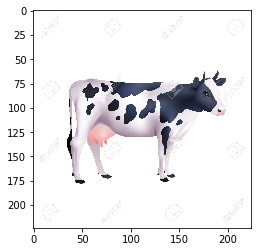

In [252]:
ingredient_image = os.path.join("Images/cow.jpg")
predict(ingredient_image)

Predicted: [('n07745940', 'strawberry', 0.9999157)]


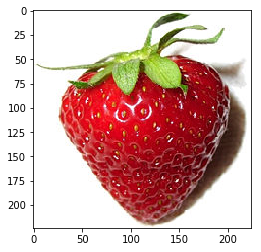

In [237]:
ingredient_image = os.path.join("Images/strawberry.jpg")
predict(ingredient_image)

In [238]:
print(ingredients)

['Banana', 'Strawberry']


In [239]:
final_recipes=[]

for recipe in recipes_title:
    if all(ingredient in recipe for ingredient in ingredients):
        final_recipes.append(recipe)
        
final_recipes_info=recipes_df.loc[recipes_df["title"].isin(final_recipes)]

final_recipes_info = final_recipes_info[["title", "calories", "rating", "categories", 
                                        "ingredients", "directions"]].sort_values(by="rating", ascending=False)
final_recipes_info

,title,calories,rating,categories,ingredients,directions
14842,Strawberry-Banana Smoothie,268.0,4.375,"[Alcoholic, Freeze/Chill, Yogurt, Cocktail, St...",[2 cups sliced hulled strawberries (about 1 on...,[Toss 2 cups strawberries and sugar in medium ...
15274,Frozen Strawberry-Banana Cake with Strawberry ...,412.0,4.375,"[Cake, Berry, Fruit, Dessert, Frozen Dessert, ...","[1 12-ounce pound cake, 1 cup strawberry prese...",[Cut cake into 1/4-inch-thick slices. Arrange ...
348,Strawberry Banana Smoothie,122.0,3.750,"[Fruit Juice, Smoothie, Non-Alcoholic, Strawbe...","[1 lb strawberries (about 1 qt), trimmed and h...",[Blend all ingredients in a blender until smoo...
5852,Strawberry Banana Margarita,286.0,3.750,"[Liqueur, Tequila, Alcoholic, Blender, Fruit, ...","[1 cup chopped strawberries, frozen solid, 1 s...","[In a blender, purée the strawberries and the ..."
6873,Strawberry and Banana Tartlets in Coconut Past...,796.0,3.125,"[Fruit, Dessert, Strawberry, Banana, Coconut, ...","[3/4 cup all-purpose flour, 3 tablespoons cold...","[In a large bowl blend together the flour, the..."


In [240]:
# Escoge la receta
id_chosen_recipe=int(input(f"Type the id of the recipe you want to check "))

print(id_chosen_recipe)

Type the id of the recipe you want to check 6873
6873


In [241]:
final_recipes_info["id_recipe"] = final_recipes_info.index.values.tolist()
final_recipes_info = final_recipes_info[["id_recipe","title", "calories", "rating", "categories", 
                                        "ingredients", "directions"]].sort_values(by="rating", ascending=False)

chosen_recipe = final_recipes_info.loc[final_recipes_info.id_recipe == id_chosen_recipe]
chosen_recipe = chosen_recipe.loc[:,("id_recipe", "title", "calories", "rating")]

date = str(input(f"Type the date MM/DD/AAAA"))
category = str(input(f"Choose a category for your meal: (B)reakfast / (L)unch / (D)inner "))

chosen_recipe["date1"] = date
chosen_recipe["category"] = category

chosen_recipe.iloc[0:]

Type the date MM/DD/AAAA05/21/2019
Choose a category for your meal: (B)reakfast / (L)unch / (D)inner D


,id_recipe,title,calories,rating,date1,category
6873,6873,Strawberry and Banana Tartlets in Coconut Past...,796.0,3.125,05/21/2019,D


In [242]:
chosen_recipe.iloc[0].to_dict()

chosen_recipe["id_recipe"] = int(chosen_recipe["id_recipe"])
chosen_recipe["calories"] = int(chosen_recipe["calories"])
chosen_recipe["rating"] = int(chosen_recipe["rating"])

# Meter los datos a base SQL

In [70]:
from sqlalchemy import create_engine
from config import dbuser, dbpasswd, dburi, dbport
import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session

In [37]:
Base = declarative_base()

In [38]:
engine = create_engine(f"mysql://{dbuser}:{dbpasswd}@{dburi}:{dbport}/recipes_db")
Base.metadata.create_all(engine)

C:\Users\maluk\Anaconda3\envs\malucastellanos\lib\site-packages\pymysql\cursors.py:170: Warning: (1366, "Incorrect string value: '\\xE9xic' for column 'VARIABLE_VALUE' at row 484")
  result = self._query(query)


In [243]:
chosen_recipe.to_sql(con=engine, name='recipes', if_exists='append', index=False)

# Leer la Base de Datos que Creamos.

In [247]:
consumed_calories = pd.read_sql_query('SELECT date1, SUM(calories) FROM recipes GROUP BY date1', con = engine)

consumed_calories

,date1,SUM(calories)
0,05/16/2019,1551.0
1,05/17/2019,1947.0
2,05/18/2019,4207.0
3,05/19/2019,4315.0
4,05/20/2019,3557.0
5,05/21/2019,1795.0


# Gráfica de Calorías Consumidas

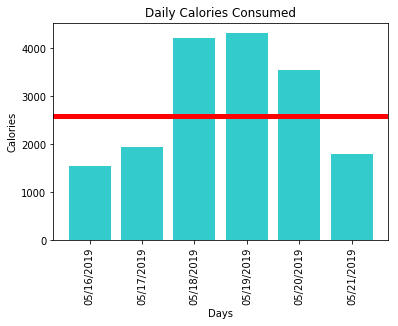

In [251]:
plt.bar(consumed_calories["date1"], consumed_calories["SUM(calories)"], color='c', alpha=0.8, align ="center")
plt.title("Daily Calories Consumed")
plt.xlabel("Days")
plt.xticks(rotation=90)
plt.ylabel("Calories")
plt.axhline(y=Nut_Req_Atnow, color = "r", linestyle = "-", linewidth = 5)
plt.savefig("Daily_Calories")
plt.show()
